In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [ ]:
data = pd.read_csv("/content/Crop_recommendation.csv")
label = pd.DataFrame(data['label'])
data = data.drop('label', axis=1)
data

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
label_encoder = LabelEncoder()
label['encoded_column'] = label_encoder.fit_transform(label['label'])
label

,label,encoded_column
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20
...,...,...
2195,coffee,5
2196,coffee,5
2197,coffee,5
2198,coffee,5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label['encoded_column'], stratify=label,random_state=1)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# activation: relu
# 1 hidden layer with 100 neurons

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
scores = clf.score(X_test, y_test)
scores

0.9581818181818181

In [ ]:
previous = None
label_stack = []
for i in label['encoded_column']:
  if i != previous:
    label_stack.append(i)
    previous = i

label_stack

[20, 11, 3, 9, 18, 13, 14, 2, 10, 19, 1, 12, 7, 21, 15, 0, 16, 17, 4, 6, 8, 5]

In [ ]:
label_arr = label.label.tolist()
label_arr = list(set(label_arr))

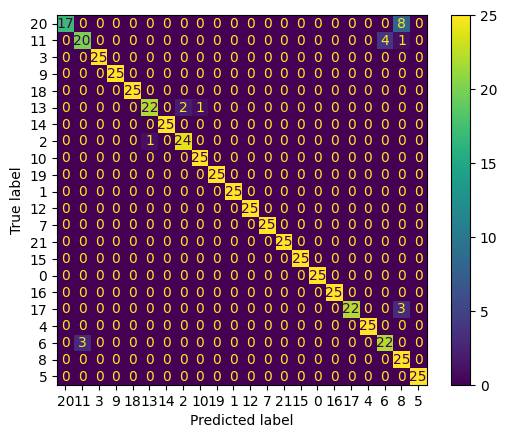

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=label_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_stack)
disp.plot()
plt.show()